# Most Basic Bayesian Interview Question

---

Are you familiar with Bayesian inference?

> Yes!

Well then you must know **the law of total probability**! What's that?

> What proportion of students will pass this class $\Pr(pass)$ if you know $\Pr(pass|quick)$ as well as the distribution of $quick$?

Now what proportion of students who will pass the class answer this question quickly?

> The structure of this question is **_the most basic Bayesian interview question_**, but it requires some assumptions...

# Bayesian Terminology 
---

## Bayes Theorem

\begin{align*}
\overset{posterior}{p(\theta|x)} &={} \frac{\overset{likelihood}{p(x|\theta)}\times \overset{prior}{p(\theta)}}{\overset{\text{evidence}}{p(x)}}\\
&={} \frac{{p(x, \theta)}}{\underset{\text{marginal likelihood}}{\displaystyle \int p(x|\theta)p(\theta) d\theta}} \textrm{ or }
\frac{{p(x, \theta)}}{\underset{\text{law of total probability}}{\displaystyle \sum_{k} p(x|\theta_k)p(\theta_k)}} =
\frac{\overset{joint}{p(x, \theta)}}{\underset{\text{normalizing constant}}{c}}
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

# Example
---
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} C^n_k\theta^{x}(1-\theta)^{n-x}\\
&&& \quad\; [\text{exponential family distribution if $n$ is known}]\\
&&& \quad\; [\text{What is this distribution? What is $C^n_k$?}]\\\\
\text{Prior} && p(\theta|\alpha,\beta) &={} \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1} \\ 
&&& \quad\; [\text{$\alpha$ and $\beta$ are called }\textbf{hyperparameters}]\\
&&& \quad\; [\text{What is this distribution? What is $\Gamma(\cdot)$?}]\\\\
\text{Posterior} && p(\theta|x,n,\alpha,\beta) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \frac{C^n_k\theta^{x}(1-\theta)^{n-x}  \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1} }{p(x)} \\
&&& = \;\texttt{What distribution parameterized how?}
\end{align*}


# Homework

---

Q1: What proportion of students who answer this question quickly will pass the class?
Assume the probability of passing the class is 0.9.
Assume the probability of answering this question quickly is 0.6 if you'll pass the class,
while the probability drops to 0.3 if you'll not pass the class. 

Q2: 
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Multinomial}\\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \texttt{Dirichlet} \\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

Q3: Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.



### Q1

\begin{align*}
\mathbb{P}(pass|quick) &= \frac{\mathbb{P}(quick|pass)\mathbb{P}(pass)}{\mathbb{P}(quick)}\\
&= \frac{(0.6)(0.9)}{\mathbb{P}(quick)}\\
&= \frac{(0.6)(0.9)}{\mathbb{P}(quick|pass)\mathbb{P}(pass) + \mathbb{P}(quick|not \, pass)\mathbb{P}(not \, pass)} \quad \text{by the law of total probability}\\
&= \frac{(0.6)(0.9)}{(0.6)(0.9) + (0.3)(1-0.9)} \\
& = \frac{0.54}{0.57}\\
&= 0.94736842105
\end{align*}

Therefore about 94.73% of students will pass the class given they answer the question quickly.


### Q2
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Multinomial}\\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \texttt{Dirichlet} \\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{Dirichlet}(\boldsymbol{\alpha} + x)\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{With Dirichlet distrubtion }\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With } \boldsymbol{\alpha} + x \text{ parameterization}\\
\end{align*}

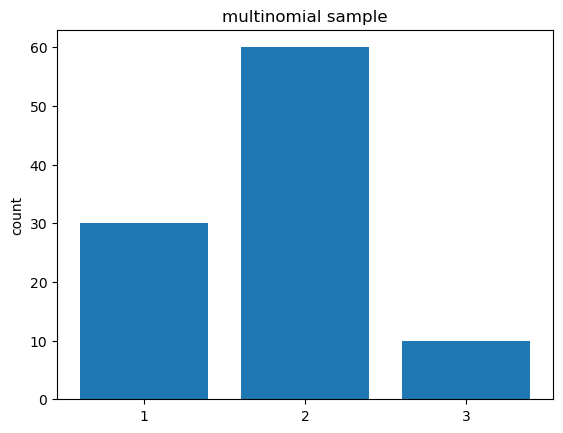

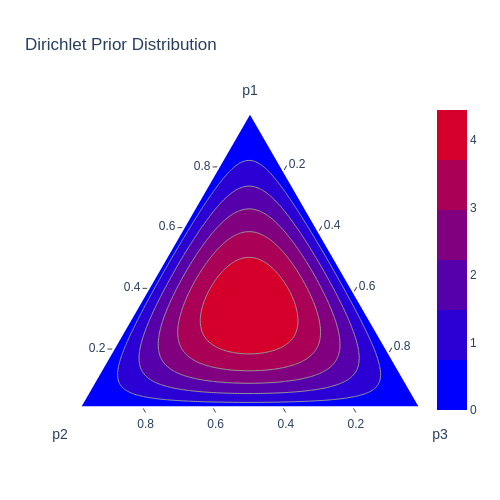

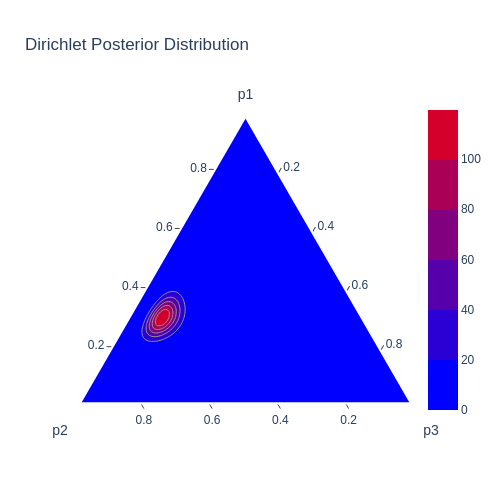

In [2]:
#Q3

import numpy as np
from scipy import stats
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

#create the sample 
n = 100  # Number of trials
multinomial_prob = [0.3, 0.6, 0.5]  
multinomial_sample = np.random.multinomial(n, multinomial_prob)

#visualize the distribution and sample
categories = ["1", "2", "3"]
plt.bar(categories, multinomial_sample)
plt.title("multinomial sample")
plt.ylabel("count")
plt.show()

#visualize the simplex Dirichlet distribution of the prior and the posterior
p1 = np.linspace(0, 1, 100)
p2 = 1 - p1.copy()
p_ = np.linspace(0, 1, 100)
p1 = (p1[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p2 = (p2[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p3 = 1 - p1 - p2
p = np.c_[p1, p2, p3]

alpha_prior = np.array([2, 2, 2])  
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)

dirichlet_prior_densities = dirichlet_prior.pdf(p.T)

alpha_posterior = alpha_prior + multinomial_sample

dirichlet_posterior = stats.dirichlet(alpha=alpha_posterior)
dirichlet_posterior_densities = dirichlet_posterior.pdf(p.T)

# visualize the prior using ternary plot
fig_prior = ff.create_ternary_contour(
    p.T, 
    dirichlet_prior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True
)
fig_prior.update_layout(title="Dirichlet Prior Distribution")
fig_prior.show('png')

# visualize the posterior using ternary plot
fig_posterior = ff.create_ternary_contour(
    p.T, 
    dirichlet_posterior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True
)
fig_posterior.update_layout(title="Dirichlet Posterior Distribution")
fig_posterior.show('png')